<a href="https://colab.research.google.com/github/Emmanuel-NS/-libretranslate-render/blob/main/PCA_Formative_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

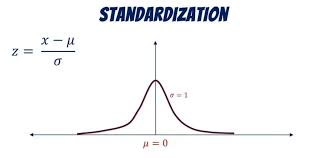


In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/sample_data/rwanda_hxl.csv")

# Drop irrelevant columns (IDs, timestamps, URLs)
df_clean = df.drop(columns=['osm_id','changeset_id','changeset_version','changeset_timestamp','#geo+bounds+url','#contact +url'], errors='ignore')

# Handle missing values (simple imputation)
df_clean = df_clean.fillna(0)

# Encode categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Standardization using NumPy (no sklearn)
# Convert the DataFrame to numeric values, coercing errors, then fill any new NaNs with 0
X = df_encoded.apply(pd.to_numeric, errors='coerce').values
X = np.nan_to_num(X, nan=0.0).astype(float) # Explicitly cast to float

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Handle cases where standard deviation might be zero to avoid division by zero
# Replace 0 with 1 in std array; this won't affect constant features (numerator will be 0)
std[std == 0] = 1

standardized_data = (X - mean) / std

# Display first few rows
standardized_data[:5]

array([[ 0.31238089, -0.17310259,  0.64934112, ..., -0.02727724,
        -0.02727724, -0.02727724],
       [-3.46909441,  3.05846095, -0.36266793, ..., -0.02727724,
        -0.02727724, -0.02727724],
       [ 0.23262935, -1.10535601, -0.36266793, ..., -0.02727724,
        -0.02727724, -0.02727724],
       [ 0.27023413, -0.66747685, -0.36266793, ..., -0.02727724,
        -0.02727724, -0.02727724],
       [ 0.271677  ,  0.31147867, -0.36266793, ..., -0.02727724,
        -0.02727724, -0.02727724]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [4]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.00074405e+00, -8.74692594e-01, -1.97949377e-01, ...,
         4.40917571e-03,  8.54791455e-03, -9.46977150e-02],
       [-8.74692594e-01,  1.00074405e+00,  1.85989179e-01, ...,
        -2.95369288e-02, -6.12996712e-03,  8.34884351e-02],
       [-1.97949377e-01,  1.85989179e-01,  1.00074405e+00, ...,
        -9.89993926e-03, -9.89993926e-03,  1.77254099e-02],
       ...,
       [ 4.40917571e-03, -2.95369288e-02, -9.89993926e-03, ...,
         1.00074405e+00, -7.44601226e-04, -7.44601226e-04],
       [ 8.54791455e-03, -6.12996712e-03, -9.89993926e-03, ...,
        -7.44601226e-04,  1.00074405e+00, -7.44601226e-04],
       [-9.46977150e-02,  8.34884351e-02,  1.77254099e-02, ...,
        -7.44601226e-04, -7.44601226e-04,  1.00074405e+00]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [5]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([7.61660627+0.j, 7.2527246 +0.j, 6.42447616+0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j]),
 array([[ 0.12163617+0.j, -0.01379184+0.j,  0.04552901+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.11189476+0.j,  0.0097776 +0.j, -0.04189311+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.14051218+0.j, -0.11260834+0.j, -0.07156504+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        ...,
        [ 0.00214502+0.j,  0.00075264+0.j,  0.00139412+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.00094168+0.j,  0.0005392 +0.j, -0.00099421+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.00805618+0.j,  0.00074561+0.j, -0.00464385+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

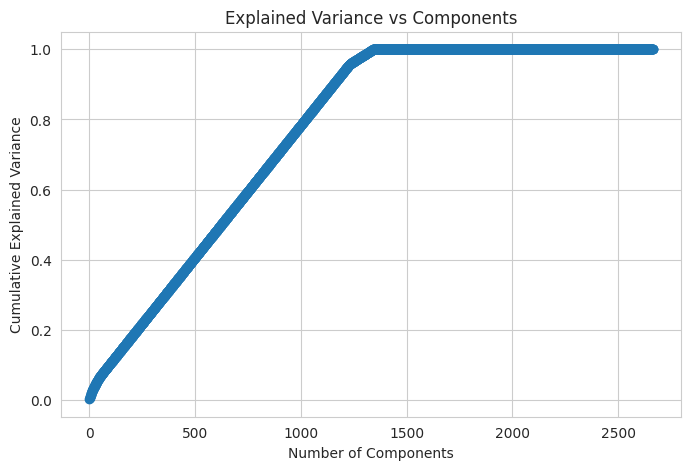

In [21]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvectors
# Scree Plot: Explained Variance vs Number of Components
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Components')
plt.grid(True)
plt.show()


### Explained Variance Selection
used the scree plot to decide how many principal components to keep.  
The cumulative explained variance shows that the first few components capture most of the variance.  
For visualization, we selected 2 components, but for analysis we could choose enough components to retain ~95% of the variance.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [7]:
# Step 6: Project Data onto Principal Components
# Decide on the number of principal components to keep. A common approach is to look at the explained variance ratio.
# For now, let's select a reasonable number, e.g., the first 2 components for visualization or a higher number if you want to retain more variance.
# For demonstration, let's choose 2 components, but you can adjust this based on your specific needs or an explained variance plot.
num_components = 2  # Example: choose the first 2 principal components

# Project data onto the principal components
# The sorted_eigenvectors are column vectors, so we select the first `num_components` columns.
# Ensure sorted_eigenvectors are real if they were complex (which they shouldn't be for real symmetric cov_matrix, but eig can return complex).
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components].real)  # Project data
reduced_data[:5]

array([[-1.65937822, -8.15491147],
       [-1.34720119,  0.32909935],
       [ 0.44806615,  0.22737459],
       [ 0.38779373,  0.232573  ],
       [ 0.40788948,  0.15972108]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [8]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (1345, 2)


array([[-1.65937822, -8.15491147],
       [-1.34720119,  0.32909935],
       [ 0.44806615,  0.22737459],
       [ 0.38779373,  0.232573  ],
       [ 0.40788948,  0.15972108]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

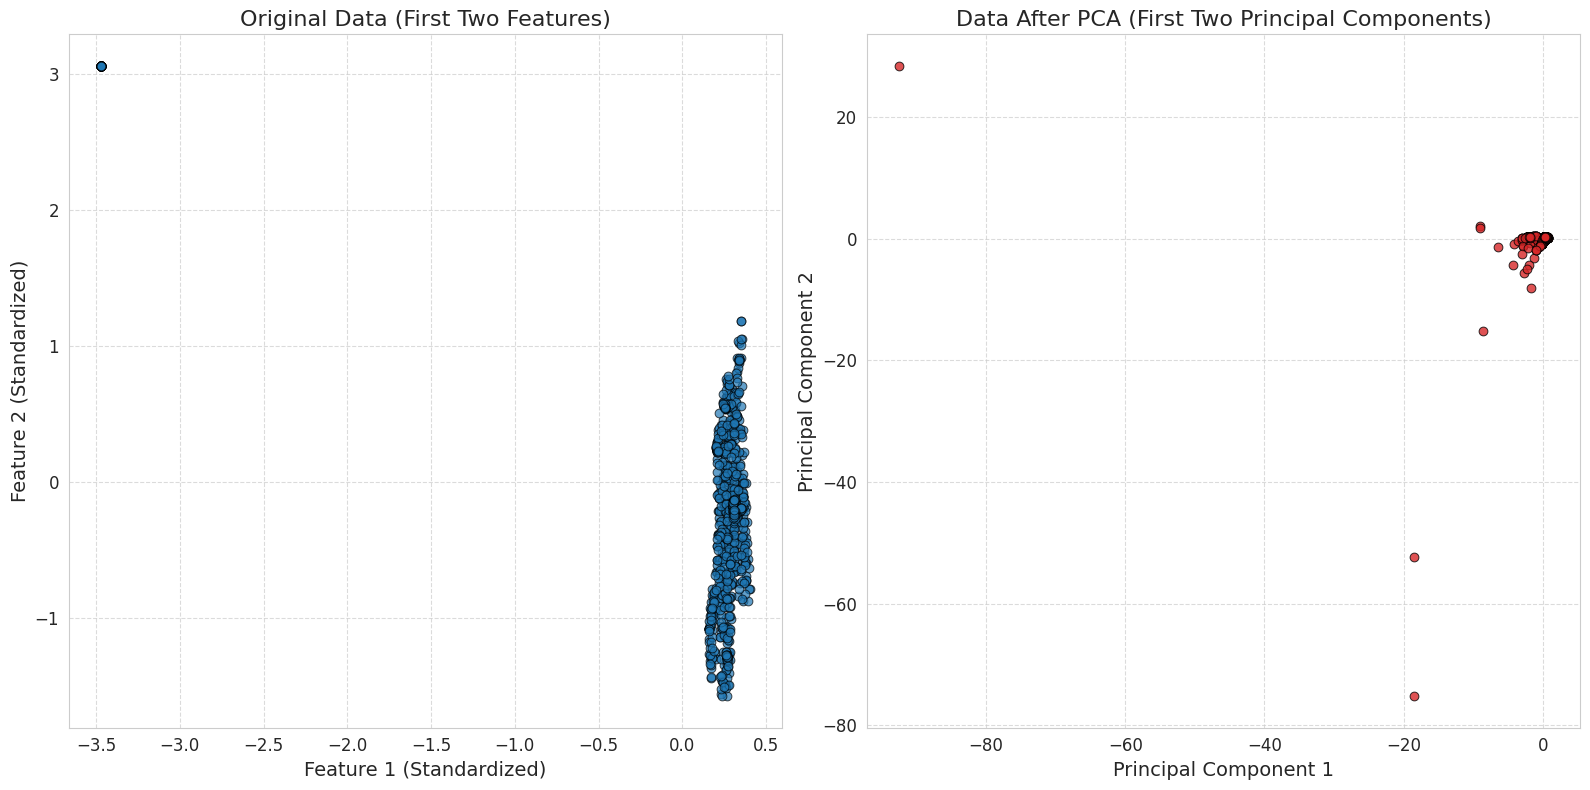

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Visualize Before and After PCA

# Set a clean seaborn style for better aesthetics and accessibility
sns.set_style("whitegrid")

plt.figure(figsize=(16, 8)) # Increase figure size for better visibility

plt.subplot(1, 2, 1)
# Increase marker size and use a distinct, high-contrast color
sns.scatterplot(x=standardized_data[:, 0], y=standardized_data[:, 1], alpha=0.7, s=40, color='#1f77b4', edgecolor='k', linewidth=0.7)
plt.title('Original Data (First Two Features)', fontsize=16)
plt.xlabel('Feature 1 (Standardized)', fontsize=14)
plt.ylabel('Feature 2 (Standardized)', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Add grid for easier reading

plt.subplot(1, 2, 2)
# Increase marker size and use another distinct, high-contrast color
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], alpha=0.8, s=40, color='#d62728', edgecolor='k', linewidth=0.7)
plt.title('Data After PCA (First Two Principal Components)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Add grid for easier reading

plt.tight_layout()
plt.show()